# WeatherPy
----


#### Analysis and observations

1. In the Temperature vs Latitude scatter plot, the temparture increease as the latitude increases
2. Latitude has no impact on cloudiness or wind speed,
3. The humidity is high as the Latitude increases 
4. The lower wind speed is concentratedin lower latitudes


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import seaborn as sns
import openweathermapy as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Setting the units to imperial to get Fahrenheit reading
settings = {"units": "imperial", "appid": api_key}

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
country =[]

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
    
 
# Print the city count to confirm sufficient count
len(cities)



600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# loop through cities, make API request, and append desired results

# Creating a dataframe from the randomly sample Latitude and Longitude
cities_df=pd.DataFrame({"Latitude":lats,"Longitude":lngs})

#Creating new columns City and Country for storing the details corresponding to the co-ordinates
cities_df["City"]=""
cities_df["Country"]=""

# Finding the city and the country code corresponding to the Latitude and Longitude
for index,row in cities_df.iterrows():
    city=citipy.nearest_city(row["Latitude"], row["Longitude"])
    cities_df.set_value(index, "City", city.city_name)
    cities_df.set_value(index, "Country", city.country_code)

# Dropping the Latitude and Longitude as they are values of the nearest city and not the excat co-ordinates of the city
cities_df=cities_df.drop(cities_df.columns[[0, 1]], axis=1)

# Deleting duplicate values from the list of cities and keeping only the first
cities_df=cities_df.drop_duplicates(['City'], keep='first')

# Randomly sampling a list of 600 cities 
cities_df=cities_df.sample(n=600)

# Resetting the index of the cities list
cities_df=cities_df.reset_index(drop=True)

cities_df.head()
        

,City,Country
0,gat,ly
1,esperance,au
2,perth,au
3,linkoping,se
4,grindavik,is


In [6]:
# Get data for each city in cities_df
weather_data = []

url="https://api.openweathermap.org/data/2.5/weather?appid=" + api_key + "&units=imperial&q="

print("\nProcessing Data\n-----------------------------")
#Get the response from OpenWeatherMapY and storing the response into weather_data if response is found
for index,row in cities_df.iterrows():  
    print("\nProcessing record %s|%s,%s"%((index+1),row["City"],row["Country"]))
    #print("\n"+url+"%s,%s"%(row["City"].replace(" ","+"),row["Country"]))
    try:
        response = owm.get_current("%s,%s"%(row["City"],row["Country"]), **settings)
        # Appending the response to the weather_Data
        weather_data.append(response)
    except:
        print("\n\033[1;31mCity not found. Skipping...\033[1;30m")

print("\n-----------------------------\nProcessing Completed\n-----------------------------")


Processing Data
-----------------------------

Processing record 1|gat,ly

City not found. Skipping...

Processing record 2|esperance,au

Processing record 3|perth,au

Processing record 4|linkoping,se

Processing record 5|grindavik,is

Processing record 6|anloga,gh

Processing record 7|oranjemund,na

Processing record 8|beringovskiy,ru

Processing record 9|araouane,ml

Processing record 10|amapa,br

Processing record 11|kidal,ml

Processing record 12|nalut,ly

Processing record 13|pechenga,ru

Processing record 14|torbay,ca

Processing record 15|bethel,us

Processing record 16|barrow,us

Processing record 17|east london,za

Processing record 18|yerbogachen,ru

Processing record 19|lundazi,zm

Processing record 20|baruun-urt,mn

Processing record 21|ambilobe,mg

Processing record 22|pisco,pe

Processing record 23|jalu,ly

Processing record 24|maningrida,au

Processing record 25|oyama,jp

Processing record 26|kologriv,ru

Processing record 27|santa cruz,cr

Processing record 28|narsaq,g


Processing record 211|porbandar,in

Processing record 212|zalantun,cn

Processing record 213|andros town,bs

Processing record 214|necochea,ar

Processing record 215|unye,tr

City not found. Skipping...

Processing record 216|artyom,az

Processing record 217|bondoukou,ci

Processing record 218|sol-iletsk,ru

Processing record 219|vega de alatorre,mx

Processing record 220|syamzha,ru

Processing record 221|belushya guba,ru

City not found. Skipping...

Processing record 222|bereda,so

City not found. Skipping...

Processing record 223|zhigalovo,ru

Processing record 224|lakes entrance,au

Processing record 225|vitim,ru

Processing record 226|severo-yeniseyskiy,ru

Processing record 227|srednekolymsk,ru

Processing record 228|ushuaia,ar

Processing record 229|agirish,ru

Processing record 230|nikolskoye,ru

Processing record 231|dingle,ie

Processing record 232|tyshkivka,ua

Processing record 233|moussoro,td

Processing record 234|cariati,it

Processing record 235|hithadhoo,mv

Processi


Processing record 416|chagda,ru

City not found. Skipping...

Processing record 417|timberlake,us

Processing record 418|fort nelson,ca

Processing record 419|longyearbyen,sj

Processing record 420|homer,us

Processing record 421|qaanaaq,gl

Processing record 422|de aar,za

Processing record 423|el dorado,us

Processing record 424|wanaka,nz

Processing record 425|xiaoshi,cn

Processing record 426|roseburg,us

Processing record 427|kahului,us

Processing record 428|skjervoy,no

Processing record 429|omboue,ga

Processing record 430|san vicente,ph

Processing record 431|kusk,af

City not found. Skipping...

Processing record 432|satipo,pe

Processing record 433|meulaboh,id

Processing record 434|georgetown,sh

Processing record 435|biloela,au

Processing record 436|ilo,pe

Processing record 437|kaeo,nz

Processing record 438|mataura,pf

City not found. Skipping...

Processing record 439|luderitz,na

Processing record 440|sentyabrskiy,ru

City not found. Skipping...

Processing record 44

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Create data to get the various parameter required to form the weather data table
summary = ["name","clouds.all","sys.country","dt","main.humidity","coord.lat", "coord.lon","main.temp_max","wind.speed"]

# Create a DataFrame with the wether data
data = [response(*summary) for response in weather_data]
column_names = ["City","Cloudiness","Country","Date","Humidity","Latitude", "Longitude","Temperature","Wind speed"]
weather_data = pd.DataFrame(data, columns=column_names)

weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Temperature,Wind speed
0,Esperance,90,AU,1563909008,100,-33.86,121.89,53.6,5.82
1,Perth,20,AU,1563908900,100,-31.95,115.86,52.0,3.36
2,Linkoping,56,SE,1563909068,77,58.41,15.62,69.8,4.70
3,Grindavik,40,IS,1563909068,67,63.84,-22.43,59.0,10.29
4,Anloga,20,GH,1563909068,83,5.79,0.90,78.8,13.87


In [8]:
# Save the result to a csv file
weather_data.to_csv("Output/Weather_Data.csv")
# Count of the data in the dataframe
weather_data.count()

City           528
Cloudiness     528
Country        528
Date           528
Humidity       528
Latitude       528
Longitude      528
Temperature    528
Wind speed     528
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

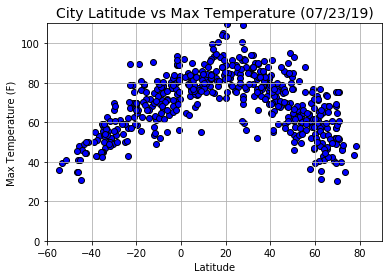

In [9]:
#plt.figure(figsize=(18,5))
plt.scatter(weather_data['Latitude'],weather_data['Temperature'],facecolors = 'blue',edgecolors='black')
plt.title('City Latitude vs Max Temperature (07/23/19)',fontsize=(14));
plt.xlim(-60,90)
plt.ylim(-0,110)
plt.grid(True)
plt.ylabel('Max Temperature (F)',fontsize=(10));
plt.xlabel('Latitude',fontsize=(10));
plt.savefig("Output/City Latitude vs Temperature.jpeg")
plt.show()

#### Latitude vs. Humidity Plot

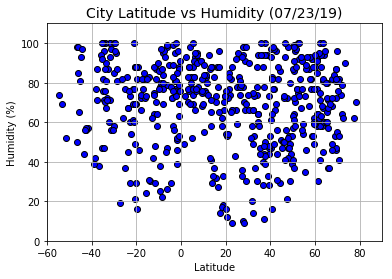

In [10]:
plt.scatter(weather_data['Latitude'],weather_data['Humidity'],facecolors = 'blue',edgecolors='black')
plt.title('City Latitude vs Humidity (07/23/19)',fontsize=(14));
plt.xlim(-60,90)
plt.ylim(-0,110)
plt.grid(True)
plt.ylabel('Humidity (%)',fontsize=(10));
plt.xlabel('Latitude',fontsize=(10));
plt.savefig("Output/City Latitude vs Humidity.jpeg")
plt.show()

#### Latitude vs. Cloudiness Plot

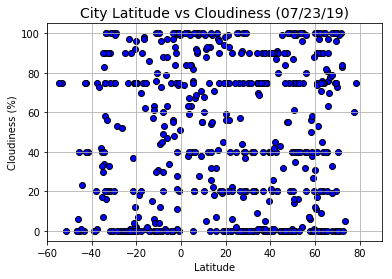

In [11]:
plt.scatter(weather_data['Latitude'],weather_data['Cloudiness'],facecolors = 'blue',edgecolors='black')
plt.title('City Latitude vs Cloudiness (07/23/19)',fontsize=(14));
plt.xlim(-60,90)
plt.grid(True)
plt.ylabel('Cloudiness (%)',fontsize=(10));
plt.xlabel('Latitude',fontsize=(10));
plt.savefig("Output/City Latitude vs Cloudiness.jpeg")
plt.show()

#### Latitude vs. Wind Speed Plot

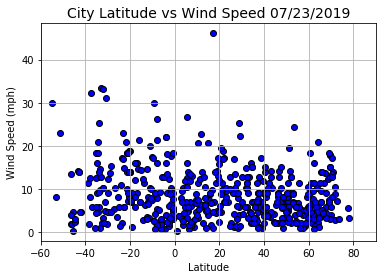

In [12]:
plt.scatter(weather_data['Latitude'],weather_data['Wind speed'],facecolors = 'blue',edgecolors='black')
plt.title('City Latitude vs Wind Speed 07/23/2019',fontsize=(14));
plt.xlim(-60,90)
plt.grid(True)
plt.ylabel('Wind Speed (mph)',fontsize=(10));
plt.xlabel('Latitude',fontsize=(10));
plt.savefig("Output/City Latitude vs Wind speed.jpeg")
plt.show()